In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer 
count = CountVectorizer()
data = pd.read_csv('/content/Train.csv', on_bad_lines='skip')
data.head()
# 0 - negative 
# 1 - positive

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
data.shape

(40000, 2)

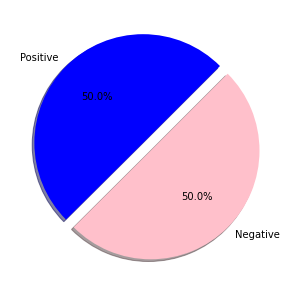

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["blue" , "pink"]
pos = data[data["label"] == 1]
neg = data[data["label"] == 0]
ck = [pos["label"].count(),neg["label"].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [ ]:
# Then we will import RE, that is, the regular expression operation, we use this library to remove html tags like ‘<a>’ or.
#  So whenever we come across these tags, we replace them with an empty string. 
# Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. 
# We will change the emojis towards the end to get a clean set of text:

In [ ]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = [] 
for i in range(0 , len(data)): 
  sentiment = re.sub('[^a-zA-Z]',' ',data['text'][i])
  sentiment = sentiment.lower()
  sentiment = sentiment.split()
  # sentiment = [ps.stem(word) for word in sentiment if not word in stopwords.words('english')]
  sentiment = ' '.join(sentiment)
  corpus.append(sentiment)

In [ ]:
len(corpus )

40000

In [ ]:
corpus

['i grew up b watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from became an art form i took my children to see the movie hoping they would get a glimpse of what i loved as a child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless a waste of film utter rubbish a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was a huge error of judgment',
 'when i put this movie in my dvd player and sat down with a coke and some chips i had some expectations i was hoping that this movie would contain som

In [ ]:
# tfidf model 
from sklearn.feature_extraction.text import TfidfVectorizer 
tv = TfidfVectorizer(max_features = 2500)
X = tv.fit_transform(corpus).toarray()

In [ ]:
y=data.label.values
# y = data["label"]
y

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
# train test split 
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
sentiment_model = MultinomialNB().fit(X_train,y_train)

In [ ]:
# prediction 
y_pred = sentiment_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

0.8445833333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5885
           1       0.85      0.84      0.85      6115

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



In [ ]:
user = input("Enter a Text: ")
# # text = cv.transform([user]).toarray()
# output = sentiment_model.predict([[user]])
# print(output)
preds = sentiment_model.predict(user)
print(preds)